<a href="https://colab.research.google.com/github/AnshulSingh-eZ/Machine_Learning_Lab_23CS067/blob/main/Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SVM for moons Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_moons
# Generate 500 samples with noise to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

In [3]:
X.shape

(500, 2)

In [ ]:
print(y)

[1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 1 0 

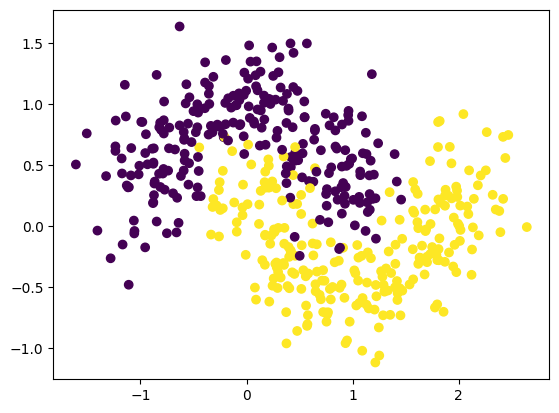

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)

In [6]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(350, 2) (150, 2) (350,) (150,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

In [8]:
from sklearn.svm import SVC

linear_model = SVC(kernel='linear', C=1.0, random_state=42)

In [10]:
linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [11]:
from sklearn.metrics import accuracy_score, classification_report


In [12]:
y_pred = linear_model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_pred)
print("Accuracy :", acc)
print(classification_report(y_val, y_pred))


Accuracy : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        76
           1       0.86      0.80      0.83        74

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



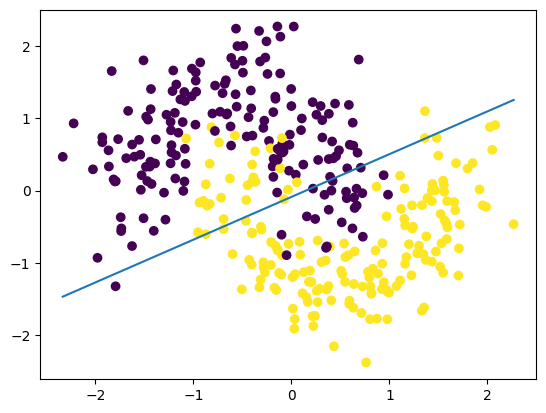

In [13]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)
w = linear_model.coef_[0]
b = linear_model.intercept_[0]

x_vals = np.linspace(X_train_scaled[:,0].min(), X_train_scaled[:,0].max(), 400)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals)
plt.show()


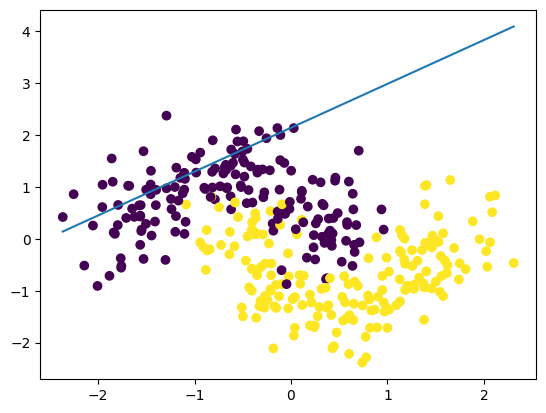

Graph with C = 0.001, Accuracy = 52%

In [14]:
rbf_model = SVC(kernel='rbf',C=1.0, random_state=42)


In [15]:
rbf_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [16]:
y_pred = rbf_model.predict(X_val_scaled)
acc = accuracy_score(y_val, y_pred)
print("Accuracy :", acc)
print(classification_report(y_val, y_pred))


Accuracy : 0.94
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        76
           1       0.99      0.89      0.94        74

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



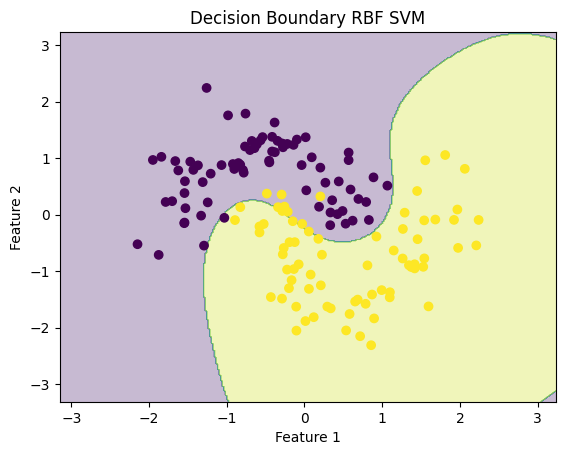

In [17]:
h = .02
x_min, x_max = X_val_scaled[:,0].min() - 1, X_val_scaled[:,0].max() + 1
y_min, y_max = X_val_scaled[:,1].min() - 1, X_val_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_val_scaled[:,0], X_val_scaled[:,1], c=y_val)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary RBF SVM")
plt.show()


In [18]:
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [0.1, 1, 10, 100],
'kernel': ['rbf']
}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, scoring='accuracy', verbose=2,cv=5)

In [21]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [27]:
print(grid.best_score_)

0.9428571428571428


In [28]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [30]:
final_predictions = grid.predict(X_val_scaled)

In [33]:
print(classification_report(y_val, final_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.97      0.93      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



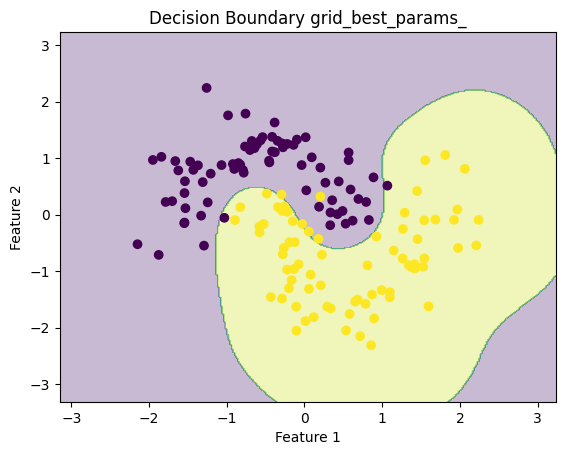

In [35]:
h = .02
x_min, x_max = X_val_scaled[:,0].min() - 1, X_val_scaled[:,0].max() + 1
y_min, y_max = X_val_scaled[:,1].min() - 1, X_val_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

plt.scatter(X_val_scaled[:,0], X_val_scaled[:,1], c=y_val)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary grid_best_params_")
plt.show()
